####  [Kaggle原文](https://www.kaggle.com/startupsci/titanic-data-science-solutions)

In [1]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [2]:
train_df = pd.read_csv('./input/train.csv')
test_df = pd.read_csv('./input/test.csv')
combine = [train_df, test_df]

# 数据分析
### 特征的描述
[Titanic Feature](https://www.kaggle.com/c/titanic/data)

In [3]:
print(train_df.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


其中分类特征： Surevived， Sex， Embarked 顺序特征： Pclass  
数字特征： 连续的： Age，Fare 离散的： SibSp， Parch

In [4]:
# preview the data
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


其中，Ticket是数字、字母混合的，Cabin是字母数字的  
Name 这个特征可能包含错误or错别字，描述名字的方法包括：包含头衔、括号以及可选的短名字

In [5]:
train_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


Cabin，Age， Embarked 包含Null  
Cabin，Age是不完整的

数据类型：
* 7个特征是整数or浮点数 测试集中为6个
* 5个特征是字符串  
如下所示

In [6]:
train_df.info()
print('_'*40)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null

#### 数字特征的分布
* 总样本 891 占实际的（2224） 40%
* Survived 非0即1
* 样本中大约38%幸存了，而实际幸存率为32%
* 大多数（>75%）的乘客没有带父母 or 孩子
* 接近30%的乘客有兄弟姐妹 or 配偶在船上
* 少数人的船费变动很大（<1%的乘客） 最高可达512刀
* 很少的乘客（<1%） 是年长的（65-80）

In [7]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
train_df.describe(percentiles=[.61, .62]) #可以看到幸存率平均为38%

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
61%,543.900000,0.000000,3.000000,32.000000,0.000000,0.000000,23.225000
62%,552.800000,1.000000,3.000000,32.000000,0.000000,0.000000,24.150000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
train_df.describe(percentiles=[.75, .8]) #看到 Parch 是否为父母 or 孩子

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
80%,713.000000,1.000000,3.000000,41.000000,1.000000,1.000000,39.687500
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
train_df.describe(percentiles=[.1, .2, .3, .4, .5, .6, .7, .8, .9, .99]) #看Age， Fare（年龄 费用）

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
10%,90.000000,0.000000,1.000000,14.000000,0.000000,0.000000,7.550000
20%,179.000000,0.000000,1.000000,19.000000,0.000000,0.000000,7.854200
30%,268.000000,0.000000,2.000000,22.000000,0.000000,0.000000,8.050000
40%,357.000000,0.000000,2.000000,25.000000,0.000000,0.000000,10.500000
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
60%,535.000000,0.000000,3.000000,31.800000,0.000000,0.000000,21.679200


### 分类特征的数据
* 姓名都是独一无二的
* 性别两种可能，65%为男性（577/891）
* Carbin的值有重复，或者部分乘客共享一个Carbin
* EMbarked 有三个可能值，S港口出发的乘客最多 C = Cherbourg, Q = Queenstown, S = Southampton
* Ticket有22%的重复率  独一无二的值为 681 刀  
如下所示：

In [11]:
train_df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Bishop, Mr. Dickinson H",male,1601,G6,S
freq,1,577,7,4,644


### 数据分析步骤

#### Correlating
* 我们希望知道每个特征与 Survival的关系。我们希望在我们的项目中很早地做这件事，并且快速匹配它们之间的相互关系
#### Completing
* 我们希望完成Age 这个特征，因为它肯定与survival有关
* 我们同样希望完成Embarked 特征，因为它可能与survival或者其他重要特征有关
#### Correcting
* Ticket特征可能会被排除，因为它有22%的重复率，而且可能与survival无关
* Cabin可能被排除，因为它不完整，在测试集和训练集中都有许多Null值
* PassengerId 可能被排除，因为它和survival无关
* Name相对不标准，可能也不会直接与survival有关，有可能排除（Mikasathebest注：如果是有名的人呢？ 可能会错过一些信息）
#### Creating
* 我们需创造一个新特征：Family，基于Parch和SibSp来获得家庭人员的总数
* 我们需要改造Name特征，来提取Title作为一个新特征
* 我们需要为Age创造新特征，使其由连续的数字特征变为按序列的分类特征
* 我们还需要为Fare特征的范围创造一个新特征，如果它对我们的分析有帮助
#### Classifying
* 我们需要根据问题描述增加假设
* Women更可能获救
* Children（Age<?）更可能获救
* 上等乘客（Pclass=1）更可能获救

### 确认假设
一般适合于分类特征（Sex， Pclass， Sibsp，Parch）这种类型
* Pclass：观察到Pclass=1与Survived有显著相关性（>0.5）
* Sex：观察到女性获救的概率74%
* SibSp and Parch： 这些特征没有确定的相关性。最好从这些独立的特征中发掘特征

In [12]:
train_df[['Pclass','Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [13]:
train_df[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [14]:
#SibSp 配偶 or 兄弟姐妹的特征
train_df[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [15]:
#Parch 父母 or 子女的特征
train_df[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


### 通过可视化分析数据

#### 相关的数字特征
让我们从理解数字特征与我们目标（Survived）之间的关系开始  
直方图对理解Age这种带状 or 分布式的数据有帮助。直方图可以通过自动定义标签or分布情况来显示样本的分布。这帮助我们鉴别特定的数值范围（婴儿会有更好的生存率吗？）
#### 观察直方图
* 婴儿（Age<4）有较高生存率
* 老人（Age=80） Survived
* 许多15-25的年轻人没有存活
* 大多数乘客年龄在15-35之间
#### 判断
* 我们在Model中应该考虑Age（classifying#2）
* 补充年龄缺失null的值 （completing #1）
* 我们应该为年龄分组（creating#3）

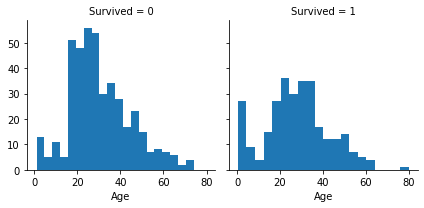

In [16]:
g = sns.FacetGrid(train_df, col='Survived')
g.map(plt.hist, 'Age',bins=20)

#### 数字特征与分类特征的相关性
我们可以将数字特征和分类特征组合在一张图里，来看它们的关系
#### Observations
* Pclass=3 有最多的乘客，然而大部分没有Survive。确定了我们的假设#2
* 婴儿乘客在Pclass=2 和Pclass=3中大多Survived。进一步确认了我们的假设#2
* 大多数Pclass=1的乘客Survived。确认了假设#3
* Pclass在不同年龄的乘客中分布
#### Decisions
* 考虑将Pclass加入模型训练中

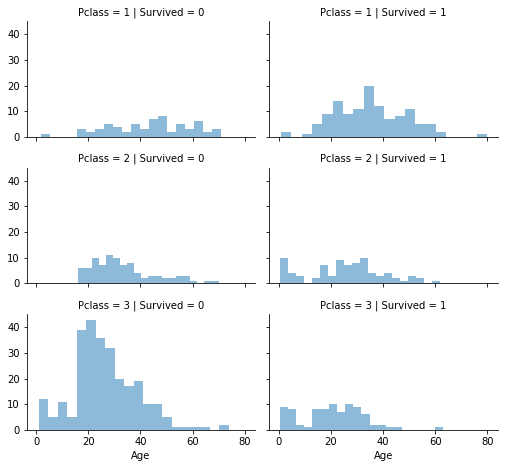

In [17]:
# grid = sns.FacetGrid(train_df, col='Pclass', hue='Survived')
grid = sns.FacetGrid(train_df, col='Survived', row='Pclass', height=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

#### Correlating Categorical Features
现在我们可以将分类特征与目标联系起来

#### Observations
* 女性乘客比男性乘客有更高生存率。确认了假设#1
* 只有Embarked=C（出发港口）的男性乘客生存率更高。这可能是因为Embarked与Pclass有关，但Embarked与Survived没有直接关系
* 在C和Q港口的男性乘客中，Pclass=3比Pclass=2的生存率更高 #2
* 对Pclass=3的男性乘客，出发港口不同，生存率也不同
#### Decisions
* 对模型加入Sex特征
* 完成并在模型中加入Embarked特征

H:\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
H:\Anaconda3\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
H:\Anaconda3\lib\site-packages\seaborn\axisgrid.py:720: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


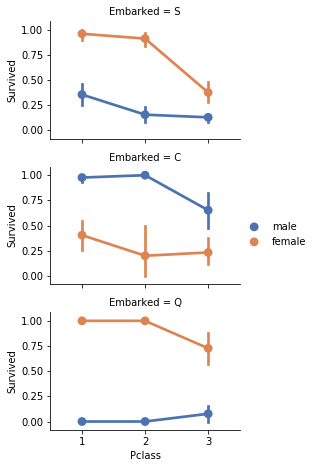

In [18]:
# grid = sns.FacetGrid(train_df, col='Embarked')
grid = sns.FacetGrid(train_df, row='Embarked', size=2.2, aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid.add_legend()

### 论证数据
我们已经根据我们的数据集和目标需求，收集了好几种假设和决定。目前我们还没必要改变单个特征or值来达到目的。现在来执行我们的假设和决定，正确化、创造数据，以便完成目标。
#### correcting by dropping features
这是一个好的开始。通过抛弃特征，我们可以处理更少的数据点。加速notebook、简化分析  
根据我们的假设和决定，我们需要抛弃Cabin 和 Ticket特征  
记住：我们需要在训练集和测试集上同时执行操作，以保证数据一致性

In [19]:
print("Before", train_df.shape, test_df.shape, combine[0].shape, combine[1].shape)

train_df = train_df.drop(['Ticket', 'Cabin'], axis=1)
test_df = test_df.drop(['Ticket', 'Cabin'], axis=1)
combine = [train_df, test_df]

"After", train_df.shape, test_df.shape, combine[0].shape, combine[1].shape

Before (891, 12) (418, 11) (891, 12) (418, 11)


('After', (891, 10), (418, 9), (891, 10), (418, 9))

#### 从存在的特征中创造新特征
在抛弃Name 和PassengerId这两个特征之前，我们想分析Name这个特征是否可以改造成 Title 与Survival之间的联系  
下面的代码，我们用正则的方法提取了Title特征。(\w+\.)匹配字母，结束为. 的Name信息。 expand = False 标志，返回一个数据框架Dataframe
#### Observations
* 大多数Titles分组正确。例如，Master头衔年龄平均为5岁
* Title 和 Age 之间的生存率变化很小
* 有些Title一定存活了（Mm，Lady，Sir） 有些则没有（Don，Rev，Jonkheer）
#### Decision
* 我们需要为模型重新创造Title特征

In [20]:
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

pd.crosstab(train_df['Title'], train_df['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


我们可以用 Rare 来命名大多数普通的Title

In [21]:
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
 	'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    
train_df[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


我们将分类特征Title转换为数字

In [22]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1


现在我们可以安全的删除 Name 和 PassengerId这两个特征  
（注意到测试集中没有‘PassengerId’这个特征）

In [23]:
train_df = train_df.drop(['Name', 'PassengerId'], axis=1)
test_df = test_df.drop(['Name'], axis=1)
combine = [train_df, test_df]
train_df.shape, test_df.shape

((891, 9), (418, 9))

#### Converting a categorical feature
现在我们可以将包含字符串的特征转换为数值。这对大多数算法都是必要的。这样做对我们完成目标有帮助  
让我们将Sex特征转换为Gender，其中 female = 1 ，male = 0

In [24]:
for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,S,1
1,1,1,1,38.0,1,0,71.2833,C,3
2,1,3,1,26.0,0,0,7.9250,S,2
3,1,1,1,35.0,1,0,53.1000,S,3
4,0,3,0,35.0,0,0,8.0500,S,1


#### Completing a numerical continuous feature
现在我们需要开始估计和完成缺失的信息（null）。首先是Age特征（完善数据）。  
我们可以考虑一下几步来完善数字连续值：  
* 一个简单的方法是随机生成一个数字，它=平均值±标准差
* 更准确的方法是，用其他相关的特征去猜年龄。这里，Age，Gender 和 Pclass是相关的。我们用Pclass和Gender特征的中位数，来猜年龄。例如，Pclass=1 Gender=0，给出一个Age；Pclass=1，Gender=1，给出一个age
* 组合使用上面两种方法。基于Pclass和Gender的信息，在平均值±标准差之间，使用一个随机数代表年龄  

注：方法1和3岁带进噪声。不同方法带来的结果不同。我们更偏向使用方法2


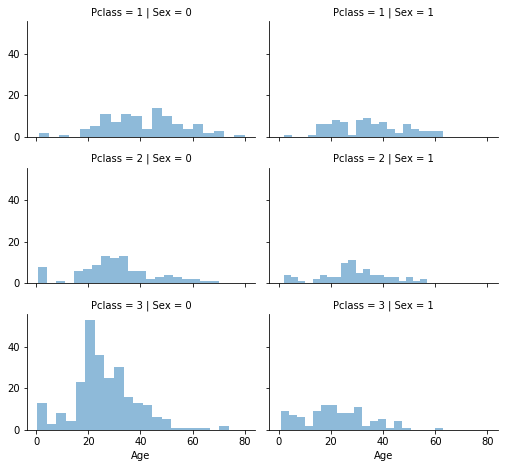

In [25]:
# grid = sns.FacetGrid(train_df, col='Pclass', hue='Gender')
grid = sns.FacetGrid(train_df, row='Pclass', col='Sex', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()

先准备一个空数组来存储：基于Pclass和Gender猜测的年龄

In [26]:
guess_ages = np.zeros((2,3))
guess_ages

array([[0., 0., 0.],
       [0., 0., 0.]])

现在我们可以在Sex（0，1） Pclass（1,2,3）上迭代，来猜测年龄，共6种组合方式（2*3）

In [27]:
for dataset in combine:
    for i in range(0, 2):
        for j in range(0, 3):
            guess_df = dataset[(dataset['Sex'] == i) & \
                                  (dataset['Pclass'] == j+1)]['Age'].dropna()

            # age_mean = guess_df.mean()
            # age_std = guess_df.std()
            # age_guess = rnd.uniform(age_mean - age_std, age_mean + age_std)

            age_guess = guess_df.median()

            # Convert random age float to nearest .5 age
            guess_ages[i,j] = int( age_guess/0.5 + 0.5 ) * 0.5
            
    for i in range(0, 2):
        for j in range(0, 3):
            dataset.loc[ (dataset.Age.isnull()) & (dataset.Sex == i) & (dataset.Pclass == j+1),\
                    'Age'] = guess_ages[i,j]

    dataset['Age'] = dataset['Age'].astype(int)

train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22,1,0,7.2500,S,1
1,1,1,1,38,1,0,71.2833,C,3
2,1,3,1,26,0,0,7.9250,S,2
3,1,1,1,35,1,0,53.1000,S,3
4,0,3,0,35,0,0,8.0500,S,1


让我们创造 年龄分布 与 survived 的相关性表格

In [28]:
train_df['AgeBand'] = pd.cut(train_df['Age'], 5)
train_df[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

,AgeBand,Survived
0,"(-0.08, 16.0]",0.550000
1,"(16.0, 32.0]",0.337374
2,"(32.0, 48.0]",0.412037
3,"(48.0, 64.0]",0.434783
4,"(64.0, 80.0]",0.090909


用年龄分组信息，来代替Age

In [29]:
for dataset in combine:    
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age']
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeBand
0,0,3,0,1,1,0,7.2500,S,1,"(16.0, 32.0]"
1,1,1,1,2,1,0,71.2833,C,3,"(32.0, 48.0]"
2,1,3,1,1,0,0,7.9250,S,2,"(16.0, 32.0]"
3,1,1,1,2,1,0,53.1000,S,3,"(32.0, 48.0]"
4,0,3,0,2,0,0,8.0500,S,1,"(32.0, 48.0]"


可以移除AgeBand特征

In [30]:
train_df = train_df.drop(['AgeBand'], axis=1)
combine = [train_df, test_df]
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,1,1,0,7.2500,S,1
1,1,1,1,2,1,0,71.2833,C,3
2,1,3,1,1,0,0,7.9250,S,2
3,1,1,1,2,1,0,53.1000,S,3
4,0,3,0,2,0,0,8.0500,S,1


#### Create new feature combining existing features
我们可以通过组合：Parch和SlibSp，创造一个新特征：FamilySize。然后抛弃Parch 和 SlibSp

In [31]:
for dataset in combine:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1  #直接 在Parch SilbSp基础上 + 1
train_df[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


我们可以创造一个新特征 IsAlone

In [32]:
for dataset in combine:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1

train_df[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean()

,IsAlone,Survived
0,0,0.505650
1,1,0.303538


抛弃 Parch，SlibSp和FamilySize 来支持 IsAlone

In [33]:
train_df = train_df.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
test_df = test_df.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
combine = [train_df, test_df]

train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,0,3,0,1,7.2500,S,1,0
1,1,1,1,2,71.2833,C,3,0
2,1,3,1,1,7.9250,S,2,1
3,1,1,1,2,53.1000,S,3,0
4,0,3,0,2,8.0500,S,1,1


人工创造一个特征，由Pclass和Age组合而来
（Age * Pclass得到）

In [34]:
for dataset in combine:
    dataset['Age*Class'] = dataset.Age * dataset.Pclass

train_df.loc[:, ['Age*Class', 'Age', 'Pclass']].head(10)

,Age*Class,Age,Pclass
0,3,1,3
1,2,2,1
2,3,1,3
3,2,2,1
4,6,2,3
5,3,1,3
6,3,3,1
7,0,0,3
8,3,1,3
9,0,0,2


#### Completing a categorical feature
Embarked特征有S，Q，C三种（根据出发港口而定），训练集中缺失了两个，我们用最常出现的值代替

In [35]:
freq_port = train_df.Embarked.dropna().mode()[0] #出现最多的港口
freq_port

'S'

In [36]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].fillna(freq_port) #‘S’填充null
    
train_df[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


#### Converting categorical feature to numeric
我们可以将Embarked特征转换为新的数值特征： Port

In [37]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,0,3,0,1,7.2500,0,1,0,3
1,1,1,1,2,71.2833,1,3,0,2
2,1,3,1,1,7.9250,0,2,1,3
3,1,1,1,2,53.1000,0,3,0,2
4,0,3,0,2,8.0500,0,1,1,6


#### Quick completing and converting a numeric feature
我们现在可以完善Fare这个特征，它在测试集中缺失了一个。用最常出现的值代替。

现在我们不是创造新特征，而是仅仅替换一个单独的值。因为Model训练需要非Null值。

我们还需要为Fare保留小数，因为它代表货币

In [38]:
test_df['Fare'].fillna(test_df['Fare'].dropna().median(), inplace=True)
test_df.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,892,3,0,2,7.8292,2,1,1,6
1,893,3,1,2,7.0000,0,3,0,6
2,894,2,0,3,9.6875,2,1,1,6
3,895,3,0,1,8.6625,0,1,1,3
4,896,3,1,1,12.2875,0,3,0,3


我们为Fare 分组

In [39]:
train_df['FareBand'] = pd.qcut(train_df['Fare'], 4)
train_df[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)

,FareBand,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


根据Fare分组信息，转换Fare

In [40]:
for dataset in combine:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)

train_df = train_df.drop(['FareBand'], axis=1)
combine = [train_df, test_df]
    
train_df.head(10)

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,0,3,0,1,0,0,1,0,3
1,1,1,1,2,3,1,3,0,2
2,1,3,1,1,1,0,2,1,3
3,1,1,1,2,3,0,3,0,2
4,0,3,0,2,1,0,1,1,6
5,0,3,0,1,1,2,1,1,3
6,0,1,0,3,3,0,1,1,3
7,0,3,0,0,2,0,4,0,0
8,1,3,1,1,1,0,3,0,3
9,1,2,1,0,2,1,3,0,0


测试集数据

In [41]:
test_df.head(10)

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,892,3,0,2,0,2,1,1,6
1,893,3,1,2,0,0,3,0,6
2,894,2,0,3,1,2,1,1,6
3,895,3,0,1,1,0,1,1,3
4,896,3,1,1,1,0,3,0,3
5,897,3,0,0,1,0,1,1,0
6,898,3,1,1,0,2,2,1,3
7,899,2,0,1,2,0,1,0,2
8,900,3,1,1,0,1,3,1,3
9,901,3,0,1,2,0,1,0,3


#### Model, predict and solve
现在我们已经准备好训练一个模型并且预测结果了。这里有60+预测算法可供选择。我们必须理解问题的类型以及解法的要求，来减少选择的可能。  
我们的问题是一个分类和回归问题（Mikasa：这里是不是有问题？分类和回归是一码事吗？）。我们希望辨别出输出（Survived or not） 与输入特征（Gender，AGE..）之间的关系。我们要执行一个叫做监督学习的机器学习方法。有了这两条标准---监督学习和分类、回归，我们可以减小选择范围至：

* Logistic Regression   (逻辑回归 熟悉
* KNN or K-Nearest Neighbors (KNN  不
* Support Vector Machines   （支持向量机 熟悉
* Naive Bayes Classifier    （朴素贝叶斯 不
* Decision Tree          （决策树  了解
* Random Forrest         （随机森林 了解 
* Perceptron            （感知机  不
* Artificial neural network   （人工神经网络  熟悉
* RVM or Relevance Vector Machine  （相关向量机  听说比SVM更好

In [42]:
X_train = train_df.drop("Survived", axis=1)
Y_train = train_df["Survived"]
X_test  = test_df.drop("PassengerId", axis=1).copy()
X_train.shape, Y_train.shape, X_test.shape

((891, 8), (891,), (418, 8))

逻辑回归（LR）是一个在刚开始非常有用的模型。 它可以测量分类依赖变量（一个或多个）之间的关系，方法是用一个逻辑函数估计概率，是一个累加的分布

注：信心分数（准确率）是基于我们的训练集而来

## Logistic Regression

In [43]:
# Logistic Regression

logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log

H:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


80.36

我们可以用LR来确认我们对于创建特征和完成目标的假设和决定。这可以通过计算决定函数中特征的系数来完成。

正系数以Log形式增加回应，负系数以log形式减少回应（相应的减少概率）

* Sex是最高的正系数，这说明当Sex增加（male:0->female:1），Survived的概率增加最明显
* 当Pclass增加，Survived=1的概率降低最多（Mikasa：意味着一等舱的人更容易幸存）
* Age*Class是一个很好的构造特征，因为它是第二高的负系数（Mikasa:意味着此系数越高，幸存概率越低）
* Title是第二高的正系数

In [47]:
coeff_df = pd.DataFrame(train_df.columns.delete(0))
coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(logreg.coef_[0])

coeff_df.sort_values(by='Correlation', ascending=False)

,Feature,Correlation
1,Sex,2.201527
5,Title,0.398234
2,Age,0.287164
4,Embarked,0.261762
6,IsAlone,0.129140
3,Fare,-0.085150
7,Age*Class,-0.311199
0,Pclass,-0.749006


## SVM

现在我们用SVM（监督学习模型）来分析预测数据。给出一组训练样本，每个标记一种分类（二分类），SVM算法建立一个模型可以对新的测试数据进行分类，使它成为一个非概率的线性分类器。

注：我们得到了一个更高的信心分数（准确率）

In [48]:
# Support Vector Machines

svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
acc_svc

H:\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


83.84

## KNN

在模式识别中，K邻近算法是一个非参数的方法，它可以用作分类和回归。一个样本通过它邻近的样本被分类，样本依据k个最邻近的数据被分类（通常k比较小），如果k=1，则样本根据最邻近的数据被分类

KNN比LR表现要好，但比SVM差（Mikasa：这里KNN分数更高啊？）

In [49]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn

84.74

## Gaussian Naive Bayes

在机器学习中，朴素贝叶斯分类器是一组概率分类器，基于贝叶斯理论，强调特征之间strong（Naive）独立。朴素贝叶斯分类器高度可扩展，在学习问题中需要多个变量（特征）数量的线性参数

注：这个模型目前得分最低

In [51]:
# Gaussian Naive Bayes

gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
acc_gaussian

72.28

## Perceptron

感知机是一种监督学习，用作二分类。  
它是一种线性分类器（基于线性函数，来组合权重，进行分类）。  
这个算法可以用作线上学习，此时它每次只能处理训练集中的一个元素。

In [54]:
# Perceptron

perceptron = Perceptron()
perceptron.fit(X_train, Y_train)
Y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)
acc_perceptron

78.34

## Linear SVC

In [55]:
# Linear SVC

linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)
Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)
acc_linear_svc

H:\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


79.12

## Stochastic Gradient Descent
（Mikasa：每次训练分数不同）

In [64]:
# Stochastic Gradient Descent

sgd = SGDClassifier()
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)
acc_sgd

79.46

## Decision Tree

这个模型用决策树来作出预测。它把特征映射到树的枝干上，来一步一步得到训练目标（树的叶子）。  
输入有限个参数的树模型，叫做分类树；这种树结构，叶子代表分类模型，枝干代表特征节点（指向分类标签）。  
决策树，可以将连续的值作为输入（例如实数），被称为回归树。

注：此模型目前得分最高

In [65]:
# Decision Tree

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree

86.76

## Random Forests

随机森林是最受欢迎的。随机森林 or 随机决策森林是一种集成学习方法。  
它通过构建多个（n_estimators=100）决策树来输出分类结果（分类） 或者 平均预期（回归）

注：此方法目前得分最高，我们决定采用这个模型结果来提交

In [66]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

86.76

我们现在可以对我们的模型进行排名，来选择最好的分类器（针对此Titanic问题）。  
决策树和随机森林分数相同，我们选择随机森林，因为决策树存在过拟合的风险。

In [68]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_linear_svc, acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,86.76
8,Decision Tree,86.76
1,KNN,84.74
0,Support Vector Machines,83.84
2,Logistic Regression,80.36
6,Stochastic Gradient Decent,79.46
7,Linear SVC,79.12
5,Perceptron,78.34
4,Naive Bayes,72.28


In [69]:
submission = pd.DataFrame({
        "PassengerId": test_df["PassengerId"],
        "Survived": Y_pred
    })
# submission.to_csv('../output/submission.csv', index=False)

我们的提交结果，在6082份结果中排名3883，这意味着竞争。  
结果仅代表子任务的数据集上的表现。  
对于我们第一次尝试，结果还不错。